# 1.0 Load Utilities

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:
import os
print(os.getcwd())

C:\Users\dou alex\Egnyte\Private\dou.alex\Orientation Documents\Trainings\NLP\machine_learning_examples\nlp_class


In [ ]:
# utility functions
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# 2.0 Load Data

In [3]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
# file contains some invalid chars
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.shape)
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.columns = ['labels','text']
print(df.head())

(5572, 5)
  labels                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# mapping label
label_map = {'ham':0, 'spam':1}
df['label_mapped'] = df['labels'].map(label_map)
Y = df['label_mapped']

In [5]:
print(df.head())

  labels                                               text  label_mapped
0    ham  Go until jurong point, crazy.. Available only ...             0
1    ham                      Ok lar... Joking wif u oni...             0
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...             1
3    ham  U dun say so early hor... U c already then say...             0
4    ham  Nah I don't think he goes to usf, he lives aro...             0


# 3.1 SKlearn Count Embedding

In [228]:
# text preprocess: vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(
    stop_words = {'english'}
    ,decode_error = 'ignore'
)
X_count_sklearn = count_vectorizer.fit_transform(df['text'] ) # Try set stopwords
print(count_vectorizer.get_feature_names()[-20:])
print(X_count_sklearn.shape)
print(X_count_sklearn[0])

['åè10', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']
(5572, 8671)
  (0, 8266)	1
  (0, 1069)	1
  (0, 3593)	1
  (0, 7644)	1
  (0, 2048)	1
  (0, 1749)	1
  (0, 4475)	1
  (0, 8488)	1
  (0, 3633)	1
  (0, 1751)	1
  (0, 4086)	1
  (0, 5536)	1
  (0, 1303)	1
  (0, 2327)	1
  (0, 5919)	1
  (0, 4349)	1
  (0, 8029)	1
  (0, 3549)	1


# 3.2 SKlearn TFIDF Embedding

In [196]:
# text preprocess: tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words = {'english'}
    ,decode_error = 'ignore'
)
X_tfidf_sklearn = tfidf.fit_transform(df['text'] ) # Try set stopwords

print(tfidf.get_feature_names()[-20:])
print(X_tfidf_sklearn.shape)
print(X_tfidf_sklearn[0])

['åè10', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']
(5572, 8671)
  (0, 3549)	0.1481298737377147
  (0, 8029)	0.22998520738984352
  (0, 4349)	0.3264252905795869
  (0, 5919)	0.2553151503985779
  (0, 2327)	0.25279391746019725
  (0, 1303)	0.24415547176756056
  (0, 5536)	0.15618023117358304
  (0, 4086)	0.10720385321563428
  (0, 1751)	0.2757654045621182
  (0, 3633)	0.1803175103691124
  (0, 8488)	0.22080132794235655
  (0, 4475)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 2048)	0.2757654045621182
  (0, 7644)	0.15566431601878158
  (0, 3593)	0.15318864840197105
  (0, 1069)	0.3264252905795869
  (0, 8266)	0.18238655630689804


In [205]:
type(doc_vec_bow)
type(X_tfidf_sklearn)

scipy.sparse.csr.csr_matrix

# 3.3.1 Customized Tokenization

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

## Define Stop Words
stopwords = stopwords.words('english')
# Add additional stopwords:
add_stopwords = ['ha','wa','even','one','doe']
stopwords = stopwords + add_stopwords

## Define Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

## Define customized preprocessor
def my_preprocessor(s):
    s = s.lower() # downcase
    tokens = word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalnum()] # remove all punctuations
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
#     bigrams = ngrams(tokens,2)
    text = ' '.join(tokens)
    return tokens, text

In [211]:
# Create bow
from gensim.corpora.dictionary import Dictionary

def my_bow(corpus):
    tokenized_corpus = []
    cleaned_corpus = []
    for text in corpus:
        tokens, cleaned_text = my_preprocessor(text)
        tokenized_corpus.append(tokens)
        cleaned_corpus.append(cleaned_text)
    
#     flat_list = [item for sublist in tokenized_corpus for item in sublist]
    
#     bow = Counter(flat_list)
    dictionary = Dictionary(tokenized_corpus) 
    return dictionary, tokenized_corpus, cleaned_corpus

# test_corpus = ["split string into words and tokens.","return wordfreq, tokenized words"]
# test_pped = [my_preprocessor(text) for text in test_corpus]
# test_bow, test_tokenized, test_cleaned = my_bow(test_corpus)

dictionary, tokenized_corpus, cleaned_corpus = my_bow(df['text'])

# visualize(' '.join(cleaned_corpus))

In [212]:
print(df.loc[df['labels']=='spam','text'].shape)
print(len(tokenized_corpus))
print(len(cleaned_corpus))
print(df.loc[df['labels']=='spam','text'].head(1))
print(tokenized_corpus[0])
print(cleaned_corpus[0])

(747,)
5572
5572
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: text, dtype: object
['jurong', 'point', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'got', 'amore', 'wat']
jurong point available bugis great world buffet cine got amore wat


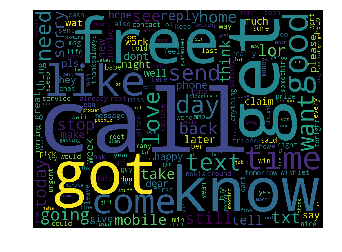

In [214]:
mapped_cfs = {dictionary.get(key):value for (key,value) in dictionary.cfs.items()}
mapped_cfs = {k: v for k, v in sorted(mapped_cfs.items(), key=lambda item: item[1], reverse=True) } # sort by # of words            
visualize(mapped_cfs)

In [215]:
take(5, mapped_cfs.items())

[('call', 600), ('get', 396), ('free', 275), ('know', 269), ('got', 249)]

# 3.3.2 Gensim TFIDF

In [189]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(doc_vec_bow)
doc_vec_tfidf = tfidf[doc_vec_bow]

In [190]:
def summarize_tfidf(tfidf_corpus):
    summ_dict = {}
    for doc in tfidf_corpus:
        for id, value in doc:
            if dictionary.get(id) not in summ_dict.keys():
                summ_dict[dictionary.get(id)] = value
            else: 
                summ_dict[dictionary.get(id)] += value
    summ_dict = {k: v for k, v in sorted(summ_dict.items(), key=lambda item: item[1], reverse=True) } # sort by # of words            
    return summ_dict
summarized_tfidf = summarize_tfidf(doc_vec_tfidf)

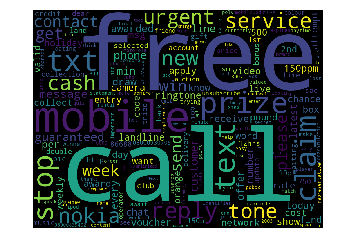

In [171]:
visualize(summarized_tfidf)

In [172]:
take(5, summarized_tfidf.items())

[('free', 20.566142362545005),
 ('call', 19.808646768461255),
 ('mobile', 16.24611686238851),
 ('prize', 15.342180588172216),
 ('claim', 15.153482815581034)]

# 4.0 Define embedding version

In [231]:
X = X_count_sklearn
print(X.shape)

(5572, 8671)


# 4.1 Train Test Split

In [232]:
# split train test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state = 711)

# 4.2 Fit and Test Model

In [235]:
# train model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain,Ytrain))
print("test score:", model.score(Xtest,Ytest))
print(classification_report(Ytest,model.predict(Xtest)))

train score: 0.9935897435897436
test score: 0.9844497607655502
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1465
           1       0.93      0.94      0.94       207

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.96      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# Optional 1: Create Word Cloud

In [145]:
# create word cloud
def visualize(input):
    if type(input) == 'str':
        wordcloud = WordCloud(width=1000, height=750).generate(text)
    elif type(input) != 'str':
        wordcloud = WordCloud(width=1000, height=750).generate_from_frequencies(input)
    else:
        raise ValueError('input is not the correct format')
                         
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [45]:
test_corpus = ["split string into words and tokens.","return wordfreq, tokenized words"]
type(test_corpus[0])
# visualize(test_corpus)

str